# Spectrograms with FFT

For this brief turorial, a data sample was made [publicly available at this link](https://gitlab.com/citymag/analysis/nuri/tree/master/docs/data/sample.bin) containing 1-hour 1-Hertz magnetic field information. The binary file available here stores the magnetic field in the X, Y and Z axis in separate columns and can be retrieved by unpack the binary contents of the file and reshaping the output array.

In [6]:
import nuri,struct,numpy
# Read binary file and sore data in array
with open('data/sample.bin','rb') as f:
    ts_data = f.read()
f.close()
# Define the total number records (24 bytes per record)
size = int(len(ts_data)/24)
# Unpack each record as the following succession:
data = struct.unpack('ddd'*size,ts_data)
# Reshape array into 2D format
data = numpy.array(data,dtype=float).reshape((size,3))
print(data)

[[ 12.69960528  21.12245232 -43.49053685]
 [ 12.69904639  21.11247024 -43.4708447 ]
 [ 12.69655633  21.1139509  -43.44855812]
 ...
 [ 12.69972023  21.13045982 -43.49853224]
 [ 12.69967644  21.12920084 -43.49652435]
 [ 12.69927102  21.13114173 -43.49554303]]


## Using Scipy functions

A spectrogram can be very easily produced using the [scipy.signal.spectrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html) module. In the example below,  we divided the 3600-sample time series into 72 segments of 50 samples. The data is sampled at 1 Hz so each segment   lasts 50 seconds. Therefore, the lowest frequency that can be covered when doing an Fast Fourier Transform (FFT) on one segment is 1/50=0.02 Hz. This also means that the maximum length of the FFT output array is 50 samples.

In [105]:
from scipy import signal
nperseg,nfft,noverlap = 100,100,50
f, t, Sxx = signal.spectrogram(data[:,1],nperseg=nperseg,nfft=nfft,noverlap=noverlap)
print(Sxx.shape)

(51, 71)


Plotting the spectrogram is the easiest part and can be done using the Matplotlib [pcolormesh](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html) module.

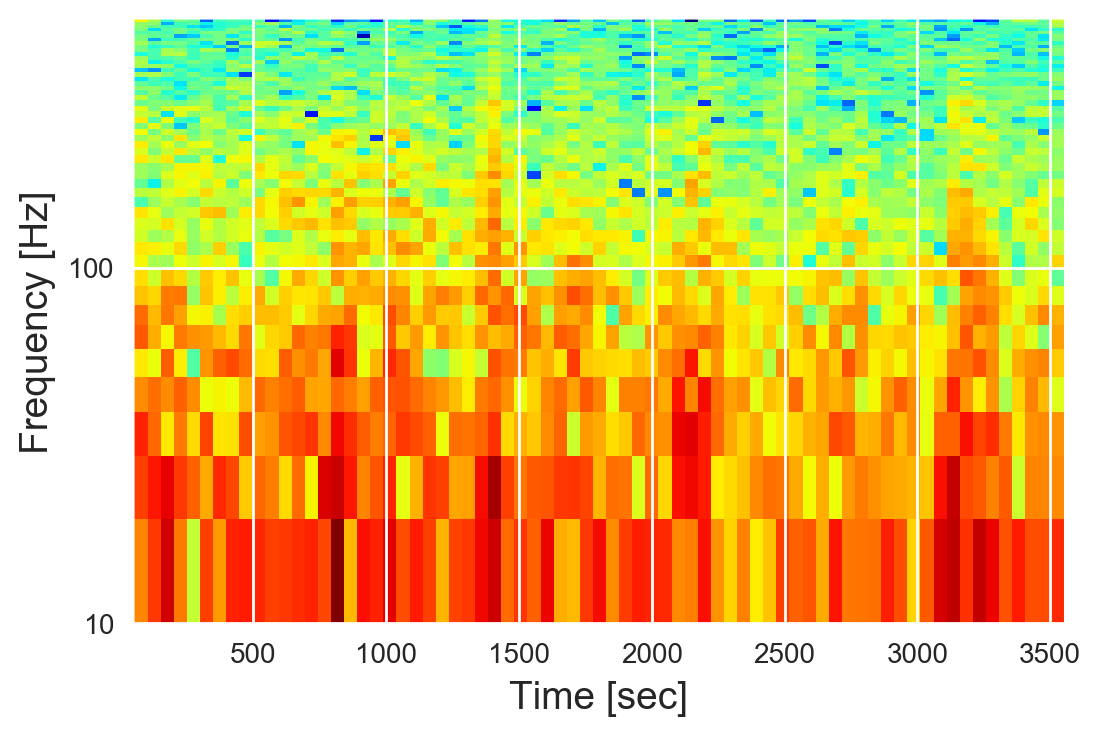

In [106]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
plt.figure(dpi=200)
#plt.pcolormesh(t, f, Sxx,norm=LogNorm(Sxx.min(),Sxx.max()), cmap='jet')
plt.imshow(Sxx[::-1],extent=[t[0],t[-1],f[0]*1e3,f[-1]*1e3],aspect='auto',interpolation='nearest',norm=LogNorm(Sxx.min(),Sxx.max()), cmap='jet')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.xlim(t[0],t[-1])
plt.ylim(1/100*1e3,f[-1]*1e3)
plt.yscale('log')
plt.show()